In [1]:
%matplotlib inline
from marketdata import *
from model import *
from analytics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Load data 

Try clean up markets with 100% close out values

In [2]:
mkts=get_market_list()

In [3]:
df=pd.DataFrame()
for m in mkts:
    try:
        df[m]=get_timeseries(m)
    except:
        print m

# Try many different look backs

In [4]:
pnl_with_lookbacks=pd.DataFrame()
FundAUM=1e6
curr_px=get_most_liquid_price(mkts)
for l in range(5,250,5):
    pos=tsmom_daily(df[mkts],l)
    pnl=calc_pnl_wc(pos,df[mkts])
    scaling_factor=calc_scaling_factor(pnl)
    s=tsmom_daily_signal(df,l)
    lots=calc_position(s,FundAUM,scaling_factor,curr_px)
    PNL = calc_pnl_position_wc(lots,df,curr_px)
    pnl_with_lookbacks[str(l/5)]= (PNL.sum(axis=1)/FundAUM).dropna()

model.py:8: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
  vol=pd.ewmstd(data,vol_lookback,min_periods=vol_lookback)*math.sqrt(256)
model.py:9: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).mean()
  signal=pd.rolling_mean(data,signal_lookback)
model.py:16: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
  vol=pd.ewmstd(data,vol_lookback,min_periods=vol_lookback)*math.sqrt(256)
model.py:17: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).mean()
  signal=pd.rolling_mean(data,signal_lookback

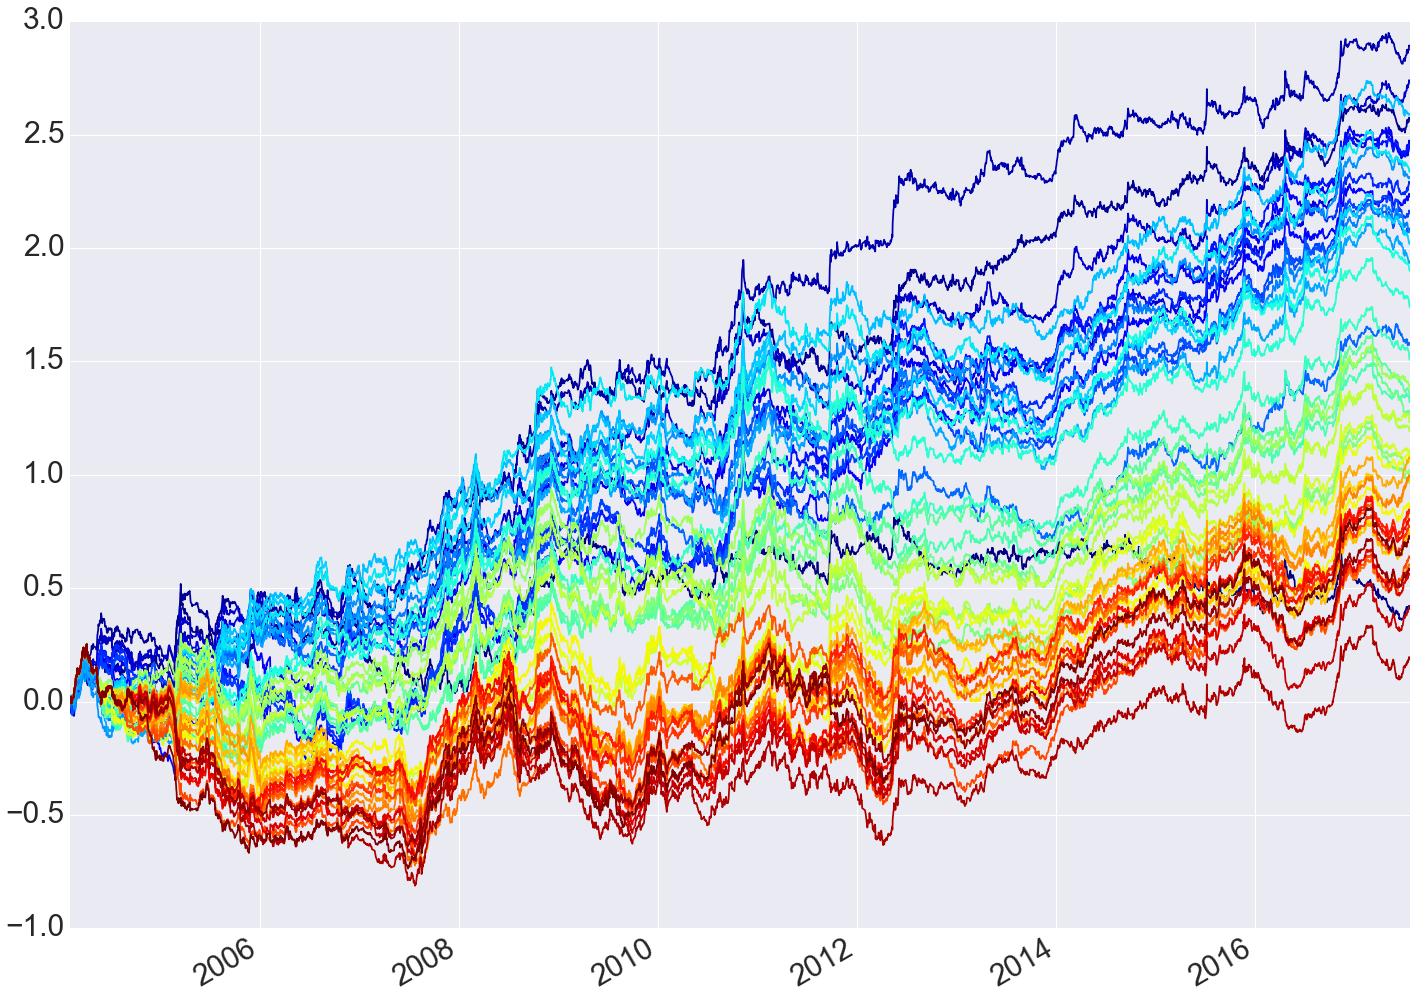

In [15]:
pnl_with_lookbacks.loc[~(pnl_with_lookbacks==0).any(axis=1)].cumsum().plot(colormap='jet',legend=False)

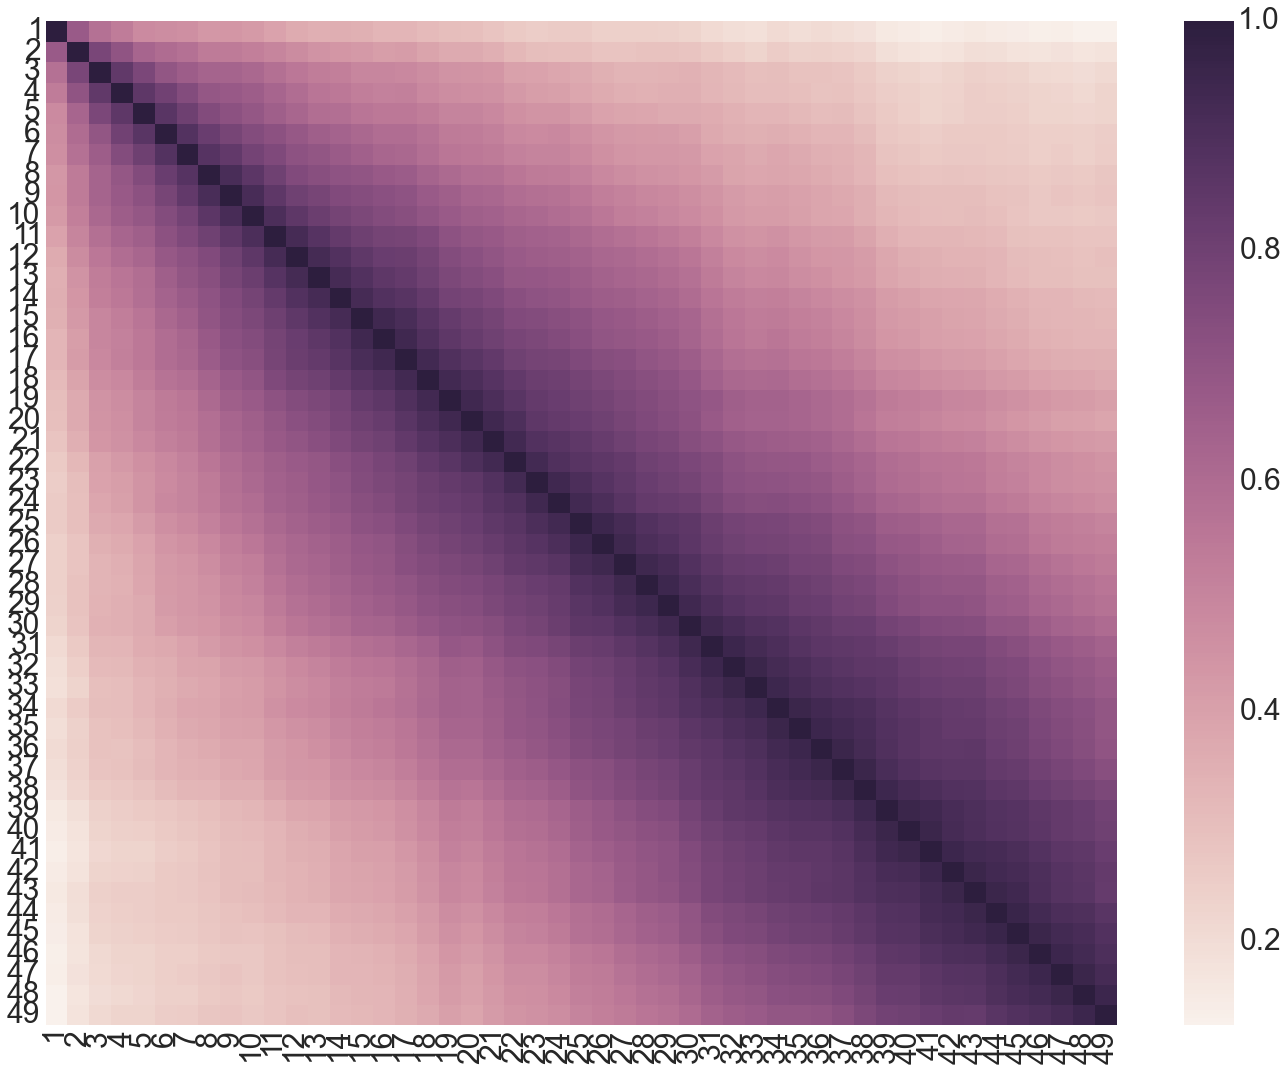

In [17]:
sns.heatmap(pnl_with_lookbacks.corr())